In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
dataset_path = '/content/drive/MyDrive/Item dataset/Item_sold_filtered_2021.csv'
columns_to_include = ['ent', 'Sold_product']

In [3]:
df = pd.read_csv(dataset_path)
df.head()

,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel
0,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,1ECZ,1,online
1,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,8CEC4Q,1,online
2,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,4E4W,2,online
3,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,DC4CC4,1,online
4,3,2021-01-01T00:00:00.000Z,2021/1,TCC4RJ11QE7,IC4CC4,1,online


In [4]:
# Group by 'Product' and sum the 'Quantity' for each group
product_sales = df.groupby('Sold_product')['Qty sold'].sum().reset_index()

# Sort the DataFrame by 'Quantity' in descending order
product_sales_sorted = product_sales.sort_values(by='Qty sold', ascending=False)

# Select the top  products
top_products = product_sales_sorted.head(20)

# Extract the product names as a list
top_products_list = top_products['Sold_product'].tolist()

# Print the list of top  products
print(top_products_list)

['5C4CCE', '5C4CC4', '8C4CCR', 'KCQCE4', 'XC4CCW', 'KCQCEC', '6CQC41', '7C4CC4', 'KC4CC4', 'BC4CC4', '5C4CEC', '8C4CC4', '8C4C4C', 'KCQCEE', '8C4CC3', '5C4C4W', 'XC4CCE', '8C4CCQ', '5CJCCW', 'KC4CQZ']


In [5]:
# user-item interactions
data = pd.read_csv(dataset_path, usecols=columns_to_include)

In [6]:
# Define the product to be excluded
product_to_exclude = "5C4CCE"

# Remove the product to exclude from the list of top products
filtered_top_products_list = [product for product in top_products_list if product != product_to_exclude]

# Filter the DataFrame to include only the remaining top products
data= data[data['Sold_product'].isin(filtered_top_products_list)]

In [7]:
# Create user-item matrix
user_item_matrix = data.pivot_table(index='ent', columns='Sold_product', aggfunc='size', fill_value=0)

# Calculate cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)

# Function to get product recommendations
def get_recommendations(item_name, top_n=5):
    item_index = user_item_matrix.columns.get_loc(item_name)
    similar_items = item_similarity[item_index]
    recommended_items_indices = similar_items.argsort()[-top_n-1:-1][::-1]
    recommended_items = user_item_matrix.columns[recommended_items_indices]
    return recommended_items

In [8]:
# Get recommendations for a specific item
item_to_recommend_for = '8C4CCR'
recommendations = get_recommendations(item_to_recommend_for)

print(f"Recommended items for {item_to_recommend_for}: {', '.join(recommendations)}")

Recommended items for 8C4CCR: 6CQC41, 5CJCCW, 5C4CC4, 8C4CC4, 7C4CC4


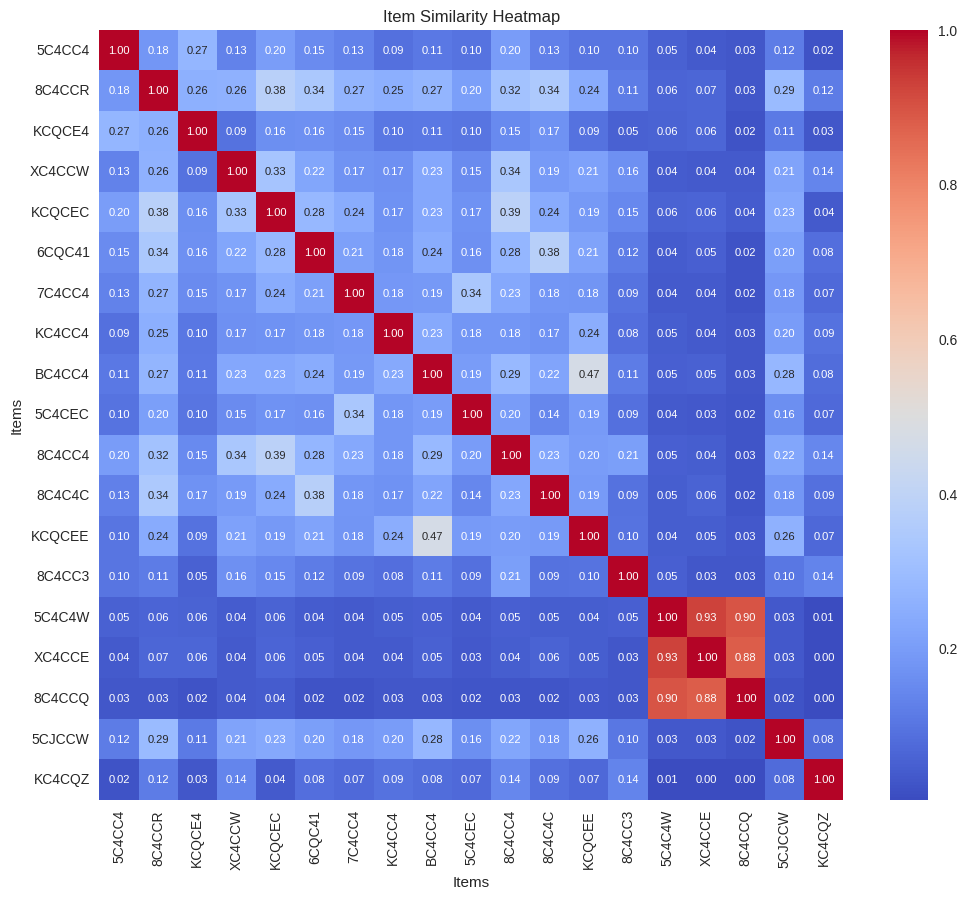

In [10]:


# Create a figure and axis for the plot
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Create a heatmap with item names and reduced font size
sns.heatmap(item_similarity, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={'size': 8},
            xticklabels=filtered_top_products_list, yticklabels=filtered_top_products_list, ax=ax)

# Set labels and title
ax.set_title('Item Similarity Heatmap')
ax.set_xlabel('Items')
ax.set_ylabel('Items')

# Rotate x and y tick labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()